# Solutions

## Reading Questions

Q1a)
It implies that relativity is not important because the ratio between $r_g$ and $r_h$ is so small, so GR mechanics should converge with Newtonian mechanics. Relativity is indeed important because:
1. Amplitudes of Newtonian corrections are inversely proportional to the distance of closest approach of the black hole, and this distance is very small for high eccentricities, which is when capture tends to occur.
2. Relativistic precession acts as a torque to put stars onto orbits of high eccentricity, which is when capture tends to occur
3. The relativistic effect is reasonable within uncertainty according to measured precession effects of real sources

Q1b) High eccentricity leads to a small distance of closest approach, which can bring the star within the /tidal/ radius, making it susceptible to capture.


The Kerr metric is the exact solution to Einstein's field equations that describes the geometry around a rotating black hole.

Q3) Event horizon is “surface from which escape to infinity requires infinite energy”, static limit is the boundary of a rotating black hole's ergosphere, where objects are forced to rotate with the black hole

Q4) Because the direction of orbital motion relative to the spin of the black hole affects what the smallest ISCO radius is (retrograde orbits have larger ISCO radius), so the effective potential is larger for retrograde orbits, and this affects the calculation of the rest of the constants of motion

Q5a) Capture occurs when an object passes within the black hole’s effective capture radius (event horizon or relativistic capture radius) and is swallowed whole, while tidal disruption occurs when tidal forces exceed the star’s self-gravity before it crosses the horizon. Which outcome occurs depends primarily on the black hole mass and the star’s physical properties, especially its radius and internal structure.

Q5b) The equations show that as as the SMBH mass increases, the tidal disruption radius moves inward relative to the gravitational radius. When encountering a larger SMBH, the tidal disruption radius of a Sun-like star lies inside the event horizon, so the star is captured whole without being disrupted.

## Reading Questions

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import rebound

import random
import astropy.constants as c
import astropy.units as u

### Part 1

a) Given that $0\leq\chi\leq1$, recreate Figure 4.14. (Note that the event horizon when spin is not = 0 is given by $r_{event} = r_g(1+\sqrt{1-\chi^2})$.) Verify this is correct by giving the capture radii $\frac{r_c}{r_g}$ for $s=0$ and $s=m$.

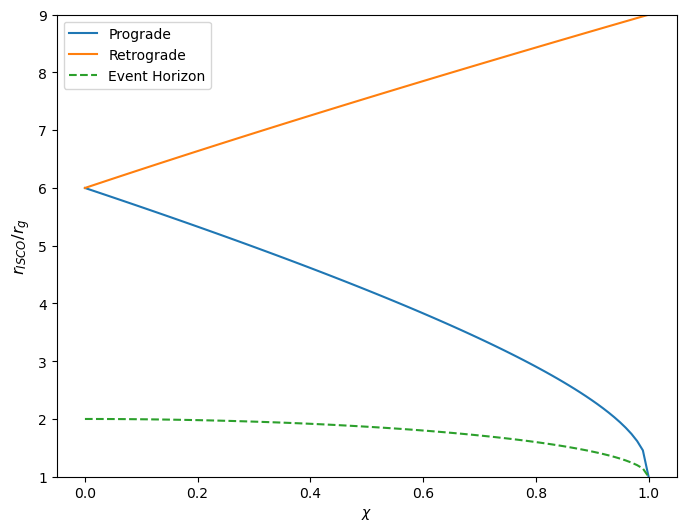

r_c/r_g at s=0:
Prograde: 6.0
Retrograde: 6.0
r_c/r_g at s=m:
Prograde: 1.0
Retrograde: 9.0


In [2]:
chi = np.linspace(0,1,100)

term1 = (1-chi**2)**(1/3)
term2 = ((1+chi)**(1/3))+ ((1-chi)**(1/3))
Z1 = 1 + (term1*term2)
Z2 = np.sqrt(3*(chi**2)+Z1**2)

r_isco1 = 3 + Z2 - ((3-Z1)*(3+Z1+2*Z2))**(1/2)
r_isco2 = 3 + Z2 + ((3-Z1)*(3+Z1+2*Z2))**(1/2)

r_event = 1+np.sqrt(1-chi**2)

plt.figure(figsize=(8,6))
plt.plot(chi, r_isco1, label='Prograde')
plt.plot(chi, r_isco2, label='Retrograde')
plt.plot(chi,r_event, linestyle='--', label='Event Horizon')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$r_{ISCO}/r_g$',fontsize=12)
plt.ylim(1,9)
plt.legend()
plt.show()

#If s=0, chi=0, so take first indices:
print('r_c/r_g at s=0:')
print('Prograde:',r_isco1[0])
print('Retrograde:',r_isco2[0])

#If s=m, chi=1, so take last indices:
print('r_c/r_g at s=m:')
print('Prograde:',r_isco1[-1])
print('Retrograde:',r_isco2[-1])

b) Approximately derive the periapsis distance at high eccentricity ($e\approx 1$) in terms of the critical angular momentum $L_c$ using the semi-latus rectum in natural units (you may need to Google an equation for this). From this, recreate Figure 4.15, using equation 4.270.

$r_p$ is given by $r_p = \frac{l}{1+e} \approx \frac{l}{2}$, $l$ is the semi-latus rectum.

$l$ is given by $l = \frac{L_c^2}{GM} \approx L_c^2$ if $r_g$ is being divided out and we're using natural units.

Therefore, $r_p \approx \frac{L_c^2}{2}$.

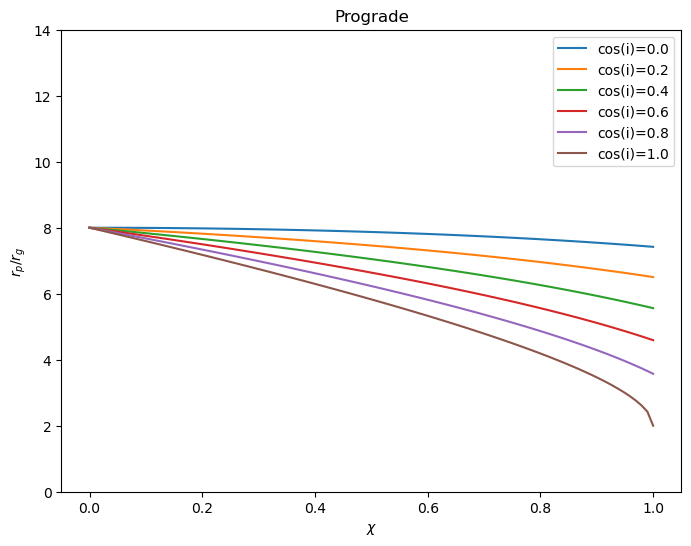

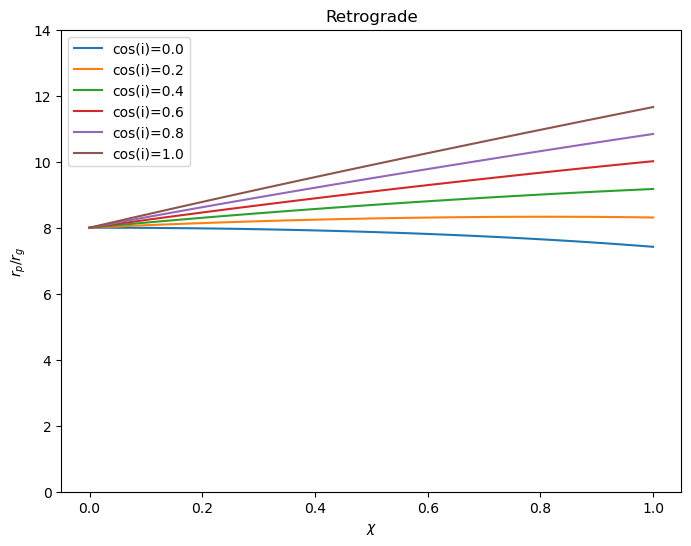

In [3]:
def F(chi, cosi):
    term1 = 1+(1/2)*chi*cosi
    term2 = (1/64)*chi**2*(7+13*cosi**2)
    term3 = (1/128)*chi**3*cosi*(23+5*cosi**2)
    term4 = (1/2048)*chi**4*(55+340*cosi**2-59*cosi**4)
    return term1+term2+term3+term4

def Lc_pro(chi, cosi):
    sqr = 1-chi*cosi-(1/8)*chi**2*(1-cosi**2)*F(chi,cosi)
    return 2+2*np.sqrt(sqr)

def Lc_retro(chi,cosi):
    sqr = 1+chi*cosi-(1/8)*chi**2*(1-cosi**2)*F(chi,-cosi)
    return 2+2*np.sqrt(sqr)

def rp_pro(chi,cosi):
    L_c = Lc_pro(chi,cosi)
    return (L_c**2)/2

def rp_retro(chi,cosi):
    L_c = Lc_retro(chi,cosi)
    return (L_c**2)/2
    
costerms = np.arange(0,1.2,0.2)
chi = np.linspace(0,1,100)

plt.figure(figsize=(8,6))
for cosi in costerms:
    r_p_pro = rp_pro(chi,cosi)
    plt.plot(chi, r_p_pro, label=f'cos(i)={round(cosi,1)}')
plt.title('Prograde')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$r_p/r_g$')
plt.ylim(0,14)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for cosi in costerms:
    r_p_retro = rp_retro(chi,cosi)
    plt.plot(chi, r_p_retro, label=f'cos(i)={round(cosi,1)}')
plt.title('Retrograde')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$r_p/r_g$')
plt.ylim(0,14)
plt.legend()
plt.show()

### Part 2

a) In ${\tt Rebound}$, create a simulation of $N=1000$ stars around a central SMBH. Distribute the stars uniformly about eccentricity $e$ and semi-major axis $a$ phase-space, for example, $a\in (0.5,2)$ and $e\in (0, 0.9)$. Simulate the motion of the stars around the SMBH and determine which will be lost to the SMBH, show the area of $a$-$e$ phase-space that is populated by doomed stars. Last week's notebook will be very useful as a starting point.

It will be useful to note that star would be lost if it has angular momentum $L < L_{lc}$ with a distance from the SMBH $r = r_{lc}$, where $r_{lc}$ is the loss-cone radius. For the purposes of this exercise, we may set the loss-cone radius to an arbitrary value (say $r_{lc} = 0.2$). Therefore, at a given timestep, a star will be lost if $L < L_{lc}$ and $r < r_{lc}$. Experiment with different ranges of $a$, $e$, and values of $r_{lc}$!

b) You should notice an early burst of losses, followed by a long period of few losses or no losses at all. Why is this? How does the feeding rate of the SMBH change if each star receives a small "kick" at each time step? (this is a rudimentary way of simulating the diffusion of angular momentum in a galactic center). Plot the accumulation of lost stars over time with this addition. 

In [4]:
sim = rebound.Simulation()
sim.G = 1.0
sim.integrator = "whfast"
sim.dt = 0.01

Nsteps = 5000
N_skip  = 1

initial_avec = []
initial_evec = []
final_avec = []
final_evec = []

sim.start_server(port=1234)

# Adding SMBH
sim.add(m=1.0, hash="SMBH")

# Adding Stars
Nstars = 2500

for _ in range(Nstars):
    a = random.uniform(0.5, 2.0)
    initial_avec.append(a)
    e = random.uniform(0.0, 0.95)
    initial_evec.append(e)
    M = random.uniform(0, 2*np.pi) # mean anomaly
    omega = random.uniform(0, 2*np.pi) # argument of pericenter
    sim.add(m=0.0, a=a, e=e, inc=0.0, M=M, omega=omega)

sim.move_to_com()

# Setting ug Loss cone
r_lc = 0.2
J_LC = np.sqrt(2 * sim.G * sim.particles["SMBH"].m * r_lc)

def angular_momentum(p):
    r = np.array([p.x, p.y, p.z])
    v = np.array([p.vx, p.vy, p.vz])
    return np.linalg.norm(np.cross(r, v))

x_store, y_store = [], []
status_store, time_store = [], []
a_store, e_store = [], []

status = np.zeros(Nstars, dtype=int)

for step in range(Nsteps):
    sim.integrate(sim.t + sim.dt)

    xs, ys = [], []
    a, e = [], []
    to_remove = []

    for i, p in enumerate(sim.particles[1:]):
        r = np.sqrt(p.x**2 + p.y**2)
        J = angular_momentum(p)

        if status[i] == 0 and J < J_LC:
            status[i] = 1   # low J "doomed"

        if status[i] == 1 and r < r_lc:
            status[i] = 2   # removed
            to_remove.append(i+1)
            continue

        xs.append(p.x)
        ys.append(p.y)
        a.append(p.a)
        e.append(p.e)

    for idx in reversed(to_remove):
        sim.remove(idx)

    kick_strength = 1e-4 

    for p in sim.particles[1:]:
        p.vx += np.random.normal(scale=kick_strength)
        p.vy += np.random.normal(scale=kick_strength)
        p.vz += np.random.normal(scale=kick_strength)


    x_store.append(np.array(xs))
    y_store.append(np.array(ys))
    a_store.append(np.array(a))
    e_store.append(np.array(e))
    
    
    status_store.append(status.copy())
    time_store.append(sim.t)

    

    if step % 1000 == 0:
        print(f"step {step}, num stars remaining: {len(sim.particles)}")


sim.stop_server(port=1234)
print("Simulation done.")

REBOUND Webserver listening on http://localhost:1234 (not secure) ...
step 0, num stars remaining: 2493
step 1000, num stars remaining: 2198
step 2000, num stars remaining: 2178
step 3000, num stars remaining: 2168
step 4000, num stars remaining: 2166
Simulation done.


In [15]:
# L = 2.5
N_lost = np.array([np.sum(s == 2) for s in status_store])
N_remaining = Nstars - N_lost
times = np.array(time_store)

print("Writing frames...")

for it, t in enumerate(time_store):


    fig, ax = plt.subplots(1,2, figsize=(12, 5))

    ax[0].scatter(a_store[it], e_store[it], color='k', s=3)
    ax[1].plot(times, N_remaining, color='black', lw=2)
    ax[1].scatter(times[it], N_remaining[it], color='red', s=100, zorder=10)

    ax[0].set(xlabel='Eccentricity', ylabel='Semi-Major Axis')
    ax[1].set(xlabel='Time', ylabel='Stars Remaining')

    plt.savefig(f"png/plot{it:03d}.png")
    plt.close()

    if it % 100 == 0:
        print(f"Wrote frame {it}")


Writing frames...
Wrote frame 0
Wrote frame 100
Wrote frame 200
Wrote frame 300
Wrote frame 400
Wrote frame 500
Wrote frame 600
Wrote frame 700
Wrote frame 800
Wrote frame 900
Wrote frame 1000
Wrote frame 1100
Wrote frame 1200
Wrote frame 1300
Wrote frame 1400
Wrote frame 1500
Wrote frame 1600
Wrote frame 1700
Wrote frame 1800
Wrote frame 1900
Wrote frame 2000
Wrote frame 2100
Wrote frame 2200
Wrote frame 2300
Wrote frame 2400
Wrote frame 2500
Wrote frame 2600
Wrote frame 2700
Wrote frame 2800
Wrote frame 2900
Wrote frame 3000
Wrote frame 3100
Wrote frame 3200
Wrote frame 3300
Wrote frame 3400
Wrote frame 3500
Wrote frame 3600
Wrote frame 3700
Wrote frame 3800
Wrote frame 3900
Wrote frame 4000
Wrote frame 4100
Wrote frame 4200
Wrote frame 4300
Wrote frame 4400
Wrote frame 4500
Wrote frame 4600
Wrote frame 4700
Wrote frame 4800
Wrote frame 4900


# To make the movie

Run the images_to_movie.sh script from last week! 

[Text(0.5, 0, 'Eccentricity'), Text(0, 0.5, 'Semi-Major Axis')]

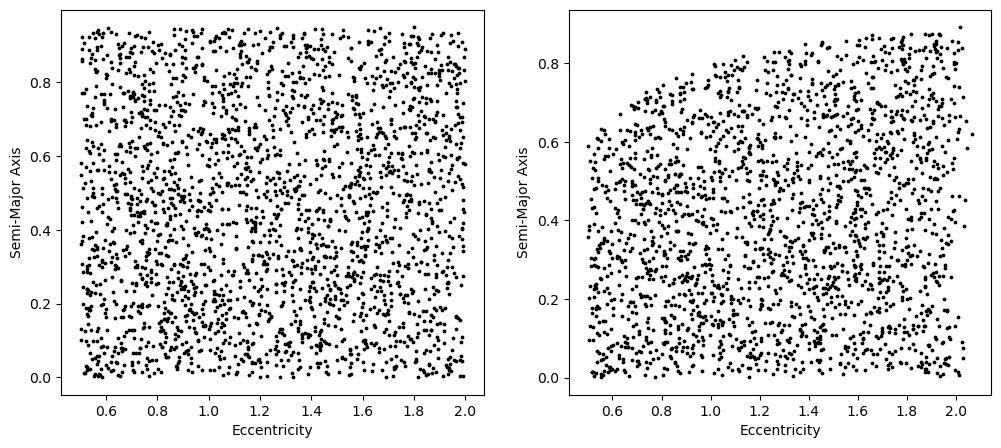

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

ax[0].scatter(a_store[0], e_store[0], color='k', s=3)
ax[1].scatter(a_store[-1], e_store[-1], color='k', s=3)

ax[0].set(xlabel='Eccentricity', ylabel='Semi-Major Axis')
ax[1].set(xlabel='Eccentricity', ylabel='Semi-Major Axis')

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Stars Remaining')]

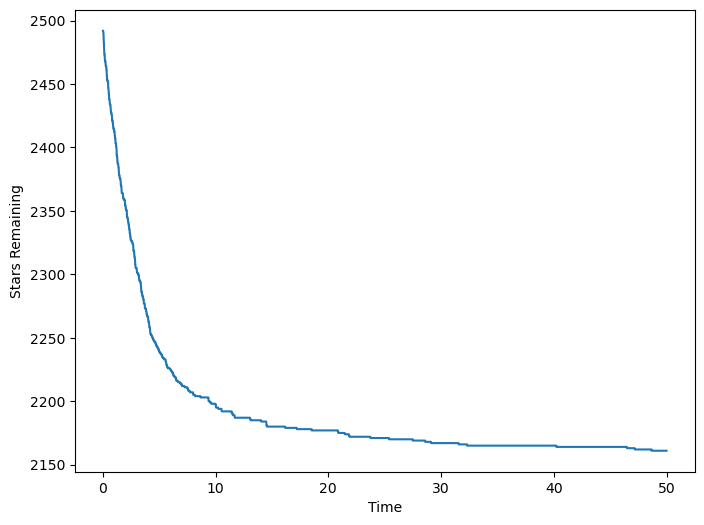

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(times, Nstars-N_lost)
ax.set(xlabel='Time', ylabel='Stars Remaining')